# Supervised Learning and K Nearest Neighbors Exercises

![knn.png](Assets/knn.png)

# Learning Objectives:

- Explain supervised learning and how it can be applied to regression and classification problems
- Apply K-Nearest Neighbor (KNN) algorithm for classification
- Apply Intel® Extension for Scikit-learn* to leverage underlying compute capabilities of hardware



# scikit-learn* 

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written. 

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed. 

These exercises will demonstrate how to apply **the Intel® Extension for Scikit-learn*,** a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel® oneAPI Data Analytics Library (oneDAL). Patching is the term used to extend scikit-learn with Intel optimizations and makes it a well-suited machine learning framework for dealing with real-life problems. 

To get optimized versions of many Scikit-learn algorithms using a patch() approach consisting of adding these lines of code Prior to importing sklearn: 

- **from sklearnex import patch_sklearn**
- **patch_sklearn()**

## This exercise relies on installation of  Intel® Extension for Scikit-learn*

If you have not already done so, follow the instructions from Week 1 for instructions





In [1]:
from __future__ import print_function
import os
data_path = ['../data']

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

## Question 1

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not? 

We will not be using them, so they can be dropped from the data.

In [2]:
df = pd.read_csv('resources/Orange_Telecom_Churn_Data.csv')

print("Columns in the dataset:")
for i in df.columns:
    print(i)

Columns in the dataset:
state
account_length
area_code
phone_number
intl_plan
voice_mail_plan
number_vmail_messages
total_day_minutes
total_day_calls
total_day_charge
total_eve_minutes
total_eve_calls
total_eve_charge
total_night_minutes
total_night_calls
total_night_charge
total_intl_minutes
total_intl_calls
total_intl_charge
number_customer_service_calls
churned


In [3]:
print("\nFirst few rows of the dataset:")
df.head().T


First few rows of the dataset:


,0,1,2,3,4
state,KS,OH,NJ,OH,OK
account_length,128,107,137,84,75
area_code,415,415,415,408,415
phone_number,382-4657,371-7191,358-1921,375-9999,330-6626
intl_plan,no,no,no,yes,yes
voice_mail_plan,yes,yes,no,no,no
number_vmail_messages,25,26,0,0,0
total_day_minutes,265.1,161.6,243.4,299.4,166.7
total_day_calls,110,123,114,71,113
total_day_charge,45.07,27.47,41.38,50.9,28.34


In [4]:
df.dtypes

state                             object
account_length                     int64
area_code                          int64
phone_number                      object
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                             bool
dtype: object

In [5]:
columns_to_drop = ['state', 'area_code', 'phone_number']
df = df.drop(columns=columns_to_drop)

In [6]:
df.dtypes

account_length                     int64
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                             bool
dtype: object

In [7]:
print("\nDataset after dropping 'state', 'area_code', and 'phone_number' columns:")
df.head().T


Dataset after dropping 'state', 'area_code', and 'phone_number' columns:


,0,1,2,3,4
account_length,128,107,137,84,75
intl_plan,no,no,no,yes,yes
voice_mail_plan,yes,yes,no,no,no
number_vmail_messages,25,26,0,0,0
total_day_minutes,265.1,161.6,243.4,299.4,166.7
total_day_calls,110,123,114,71,113
total_day_charge,45.07,27.47,41.38,50.9,28.34
total_eve_minutes,197.4,195.5,121.2,61.9,148.3
total_eve_calls,99,103,110,88,122
total_eve_charge,16.78,16.62,10.3,5.26,12.61


## Question 2

* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded using one of the methods from the lecture.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [8]:
label_binarizer = LabelBinarizer()

categorical_columns = ['intl_plan', 'voice_mail_plan', 'churned']
for column in categorical_columns:
    df[column] = label_binarizer.fit_transform(df[column])

print("\nDataset after encoding categorical features:")
df.head().T


Dataset after encoding categorical features:


,0,1,2,3,4
account_length,128.00,107.00,137.00,84.00,75.00
intl_plan,0.00,0.00,0.00,1.00,1.00
voice_mail_plan,1.00,1.00,0.00,0.00,0.00
number_vmail_messages,25.00,26.00,0.00,0.00,0.00
total_day_minutes,265.10,161.60,243.40,299.40,166.70
total_day_calls,110.00,123.00,114.00,71.00,113.00
total_day_charge,45.07,27.47,41.38,50.90,28.34
total_eve_minutes,197.40,195.50,121.20,61.90,148.30
total_eve_calls,99.00,103.00,110.00,88.00,122.00
total_eve_charge,16.78,16.62,10.30,5.26,12.61


In [9]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['churned']))

scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])  # Exclude the target variable
scaled_df['churned'] = df['churned']

print("\nDataset after scaling features:")
scaled_df.head().T


Dataset after scaling features:


,0,1,2,3,4
account_length,0.524793,0.438017,0.561983,0.342975,0.305785
intl_plan,0.000000,0.000000,0.000000,1.000000,1.000000
voice_mail_plan,1.000000,1.000000,0.000000,0.000000,0.000000
number_vmail_messages,0.480769,0.500000,0.000000,0.000000,0.000000
total_day_minutes,0.754196,0.459744,0.692461,0.851778,0.474253
total_day_calls,0.666667,0.745455,0.690909,0.430303,0.684848
total_day_charge,0.754183,0.459672,0.692436,0.851740,0.474230
total_eve_minutes,0.542755,0.537531,0.333242,0.170195,0.407754
total_eve_calls,0.582353,0.605882,0.647059,0.517647,0.717647
total_eve_charge,0.542866,0.537690,0.333225,0.170171,0.407959


## Question 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [10]:
X = scaled_df.drop(columns=['churned'])
y = scaled_df['churned']

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X, y)

y_pred = knn_model.predict(X)

predicted_df = pd.DataFrame({'Actual Churned': y, 'Predicted Churned': y_pred})
print("\nPredicted outcomes on the same data:")
predicted_df.head().T


Predicted outcomes on the same data:


,0,1,2,3,4
Actual Churned,0,0,0,0,0
Predicted Churned,0,0,0,0,0


## Question 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [12]:
def calculate_accuracy(actual, predicted):
    """
    Calculate accuracy given the actual and predicted labels.
    
    Parameters:
    - actual: Actual labels
    - predicted: Predicted labels
    
    Returns:
    - accuracy: Accuracy score
    """
    correct_predictions = np.sum(actual == predicted)
    total_predictions = len(actual)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [13]:
accuracy = calculate_accuracy(y, y_pred)

print(f"\nAccuracy of the K-nearest neighbors model: {accuracy:.2%}")


Accuracy of the K-nearest neighbors model: 94.22%


## Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

In [14]:
knn_distance_model = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_distance_model.fit(X, y)
y_pred_distance = knn_distance_model.predict(X)

accuracy_distance = calculate_accuracy(y, y_pred_distance)
print(f"\nAccuracy with distance weights: {accuracy_distance:.2%}")


Accuracy with distance weights: 100.00%


In [15]:
knn_uniform_manhattan_model = KNeighborsClassifier(n_neighbors=3, weights='uniform', p=1)
knn_uniform_manhattan_model.fit(X, y)
y_pred_uniform_manhattan = knn_uniform_manhattan_model.predict(X)

accuracy_uniform_manhattan = calculate_accuracy(y, y_pred_uniform_manhattan)
print(f"Accuracy with uniform weights and Manhattan distance: {accuracy_uniform_manhattan:.2%}")

Accuracy with uniform weights and Manhattan distance: 94.56%


## Question 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

In [16]:
import matplotlib.pyplot as plt

accuracy_list = []
k_values = list(range(1, 21))

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X, y)
    y_pred_k = knn_model.predict(X)
    accuracy_k = calculate_accuracy(y, y_pred_k)
    accuracy_list.append(accuracy_k)

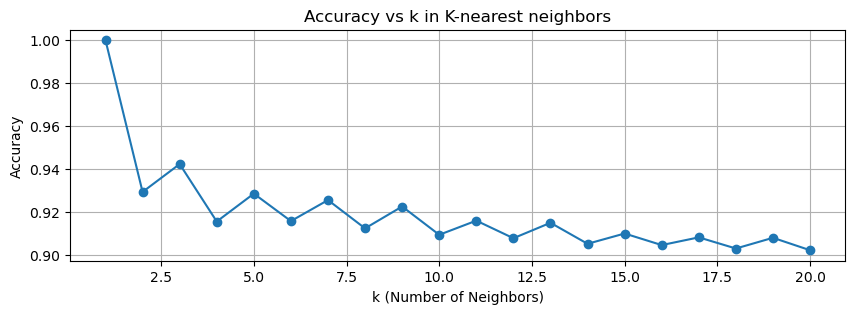

In [17]:
# Plot accuracy vs k
plt.figure(figsize=(10, 3))
plt.plot(k_values, accuracy_list, marker='o')
plt.title('Accuracy vs k in K-nearest neighbors')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()